# Dr. Semmelweis and the Importance of Handwashing

Reanalyze the data behind one of the most important discoveries of modern medicine: handwashing.

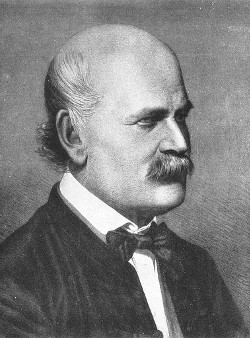

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on **June 1st, 1847**, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital and the number of deaths.

The data is stored as two CSV files within the `data` folder.

`data/yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`data/monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

## How much did handwashing reduce monthly death rates on average?

- What year had the highest yearly proportion of deaths at each clinic? Visualize the data and store the answer as an integer variable `highest_year`.
- Handwashing was introduced on June 1st, 1847. What are the mean proportions of deaths before and after handwashing from the monthly data? Store the result as a 2x2 DataFrame named `monthly_summary` with the first column, `handwashing_started`, being a boolean flag and the second column having the mean proportion of deaths.
- Analyze the difference in the mean monthly proportion of deaths before and after the introduction of handwashing using all of the data and calculate a 95% confidence interval. Store your answer as a pandas series `confidence_interval`.

In [82]:
# Imported libraries
import pandas as pd
import matplotlib.pyplot as plt

### 1. Identify the year with the highest death proportion for each clinic

Load the yearly data and calculate the proportion of deaths in a new column; then loop through the data to visualize the proportion at each clinic.

In [83]:
# load yearly data and stored as 'df'
df = pd.read_csv('data/yearly_deaths_by_clinic.csv')
df.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [84]:
def data_info(dataframe):
    display(dataframe.info())
    display(dataframe.isna().sum())
    
data_info(df)    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


None

year      0
births    0
deaths    0
clinic    0
dtype: int64

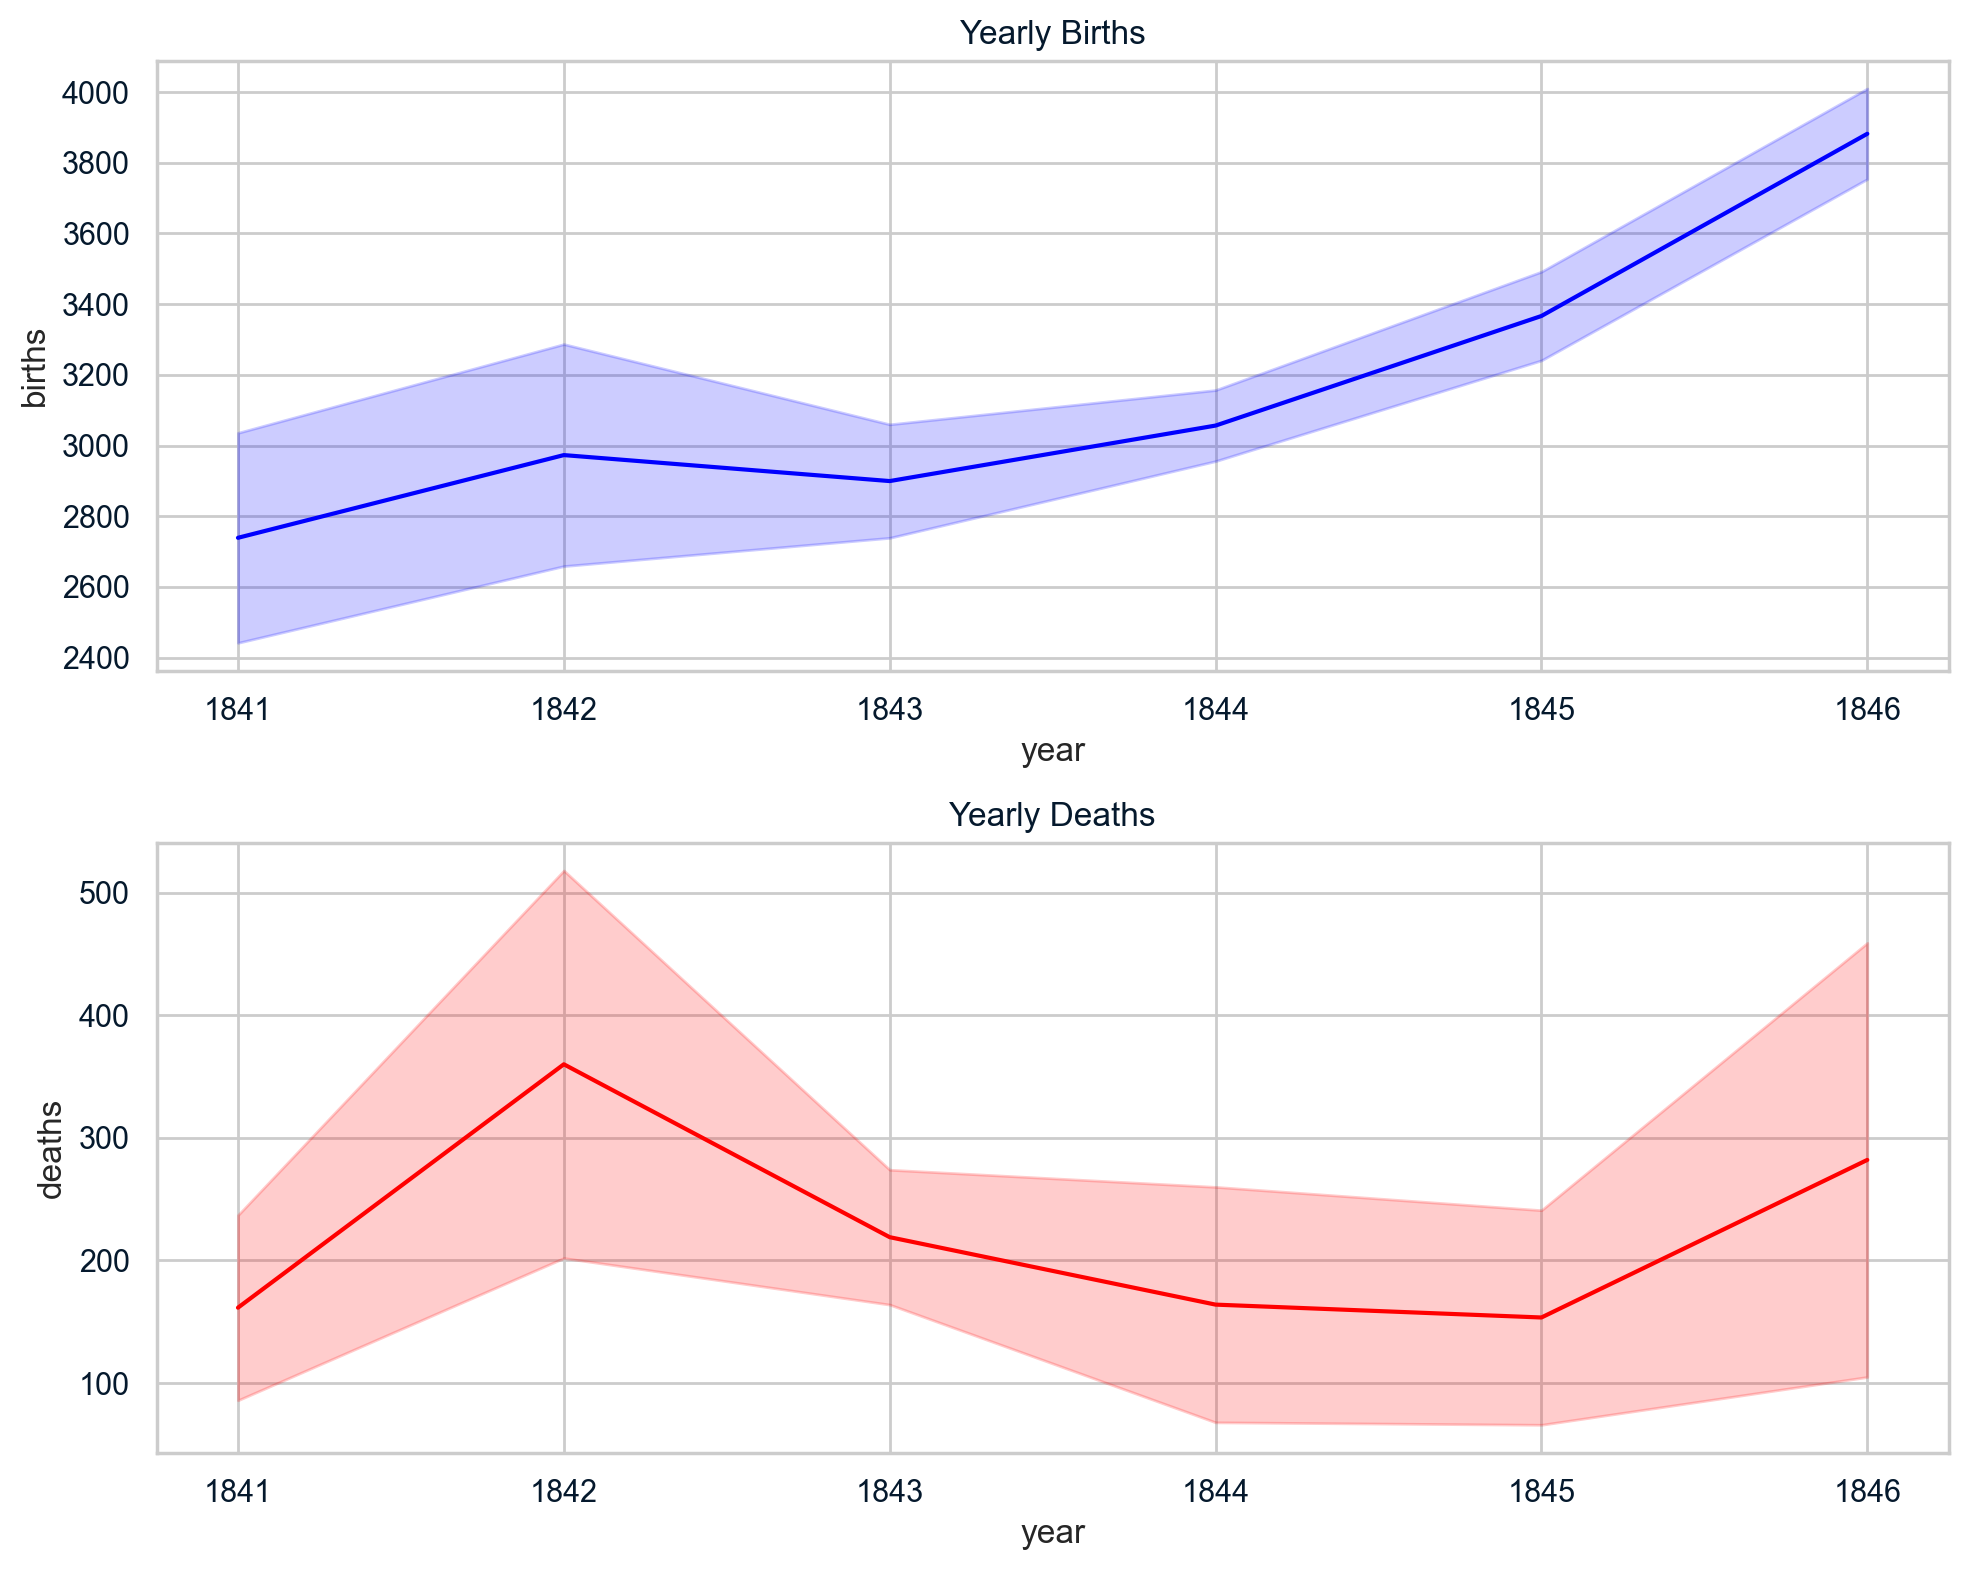

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

sns.lineplot(data=df, x='year', y='births', ax=axes[0], color='blue')
axes[0].set_title('Yearly Births')

sns.lineplot(data=df, x='year', y='deaths', ax=axes[1], color='red')
axes[1].set_title('Yearly Deaths')

plt.tight_layout()
plt.show()

In [88]:
# show number of each clinic
display(df['clinic'].value_counts())

clinic 1    6
clinic 2    6
Name: clinic, dtype: int64

In [89]:
def death_birth(dataframe):
    year_birth = dataframe.groupby('year')['births'].sum()
    year_death = dataframe.groupby('year')['deaths'].sum()

    return year_birth, year_death

year_birth, year_death = death_birth(df)
display(year_birth)
display(year_death)

year
1841    5478
1842    5946
1843    5799
1844    6113
1845    6733
1846    7764
Name: births, dtype: int64

year
1841    323
1842    720
1843    438
1844    328
1845    307
1846    564
Name: deaths, dtype: int64

### 2. Determine the mean monthly death proportion before and after handwashing

Load the monthly data and calculate the proportion of deaths in a new column. Add a threshold to create a boolean column identifying when handwashing was introduced and calculate the mean.

In [90]:
# Add proportion_deaths to the DataFrames
df["proportion_deaths"] = df["deaths"] / df["births"]
df

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [93]:
# find the year with the highest death proportion
highest_year_0 = df['proportion_deaths'].idxmax()
highest_year = df.loc[highest_year_0, 'year']
highest_year

1842

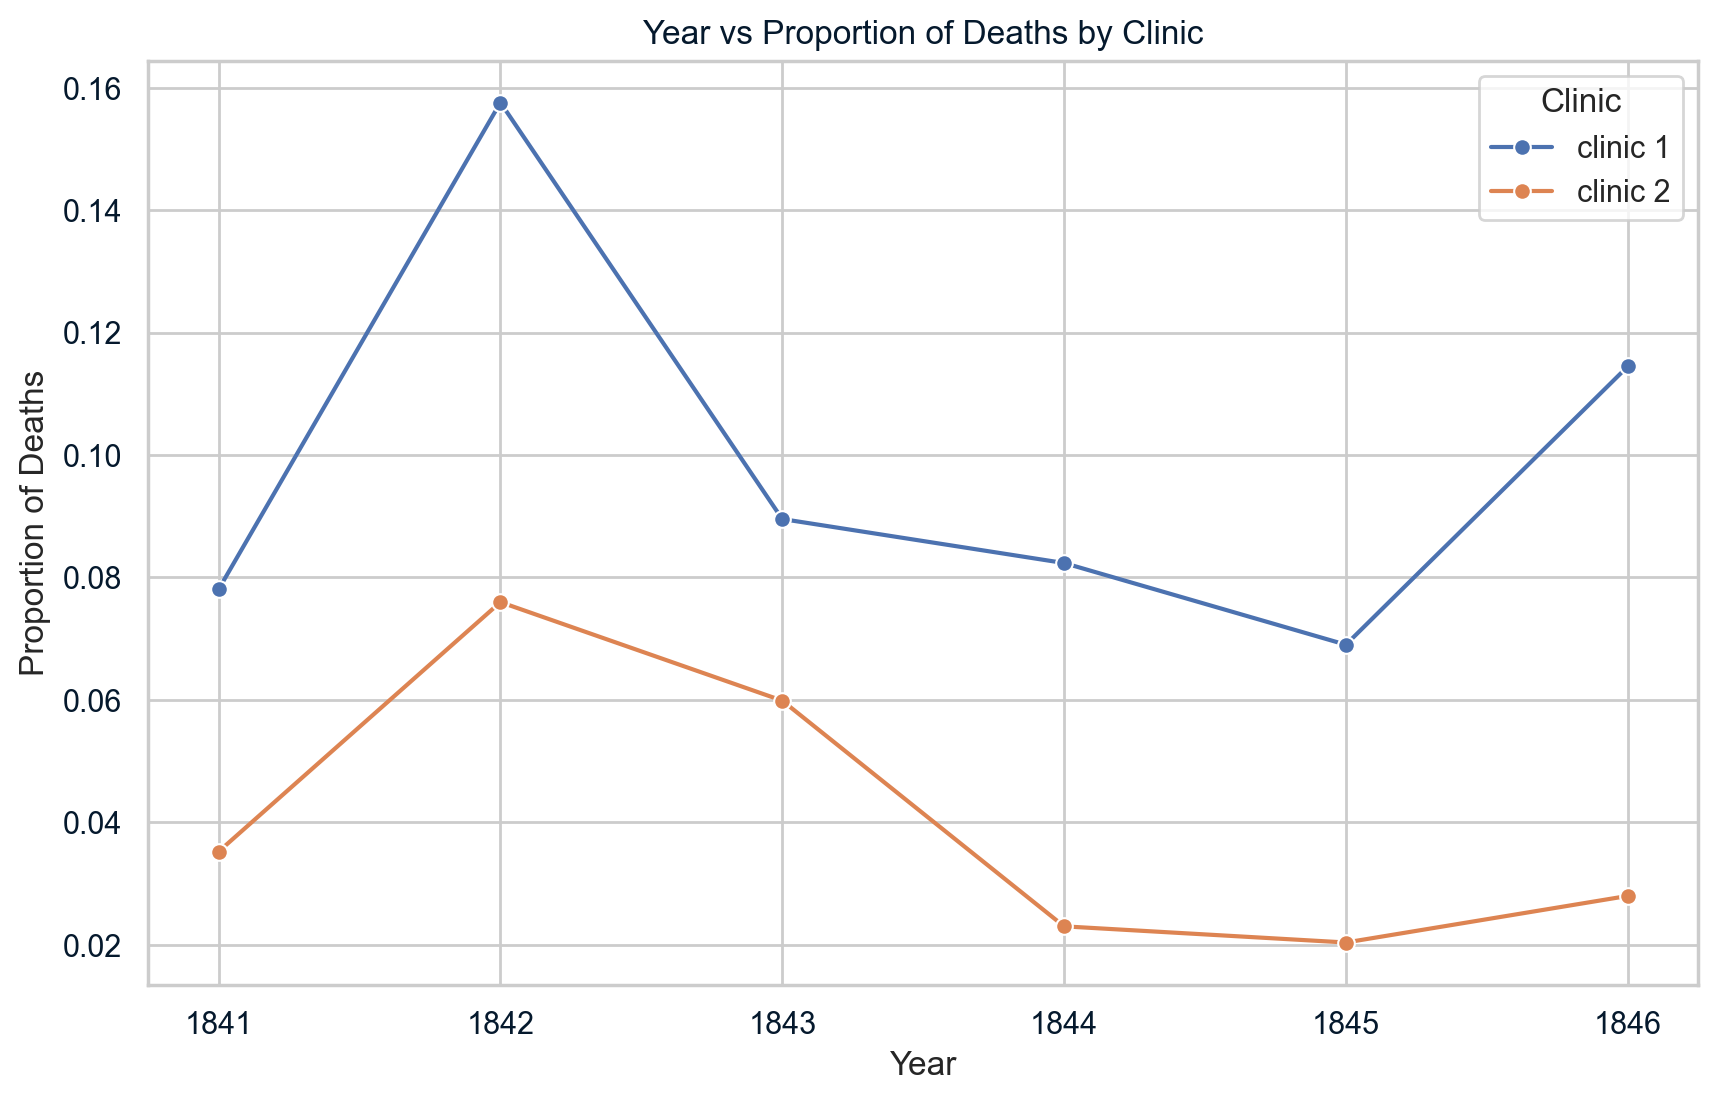

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the seaborn style
sns.set(style="whitegrid")

# Create the plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='proportion_deaths', hue='clinic', marker='o')

# This code is optional but makes your visualization look neater and readable
plt.xlabel('Year')
plt.ylabel('Proportion of Deaths')
plt.title('Year vs Proportion of Deaths by Clinic')
plt.legend(title='Clinic')
plt.grid(True)
plt.show()

### 3. Calculate a 95% confidence interval

Create two `pandas` Series separating the monthly proportion of deaths values before and after handwashing. Loop through and analyze this data by performing sampling with replacement, calculating the means, and finding the 95% confidence interval.

In [97]:
# load monthly data and stored as 'df_2'
df_2 = pd.read_csv('data/monthly_deaths.csv')
df_2.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [98]:
def data_info(dataframe):
    display(dataframe.info())
    display(dataframe.isna().sum())
    
data_info(df_2)    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


None

date      0
births    0
deaths    0
dtype: int64

In [99]:
# Add proportion_deaths to the DataFrame
df_2["proportion_deaths"] = df_2["deaths"] / df_2["births"]
df_2.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


In [100]:
# Add the threshold as the date handwashing was introduced
handwashing_start = '1847-06-01'

# Create a boolean column that shows True after the date handwashing was introduced
df_2['handwashing_started'] = df_2['date'] >= handwashing_start
df_2.head()

,date,births,deaths,proportion_deaths,handwashing_started
0,1841-01-01,254,37,0.145669,False
1,1841-02-01,239,18,0.075314,False
2,1841-03-01,277,12,0.043321,False
3,1841-04-01,255,4,0.015686,False
4,1841-05-01,255,2,0.007843,False


In [101]:
# Group by the new boolean column calculate the mean proportion of deaths
# Reset the index to store the result as a DataFrame
monthly_summary_0 = df_2.groupby('handwashing_started').agg(
    mean_proportion_deaths=('proportion_deaths', 'mean')
).reset_index()

print(monthly_summary_0)

   handwashing_started  mean_proportion_deaths
0                False                0.105050
1                 True                0.021093


In [114]:
def display_handwashing_data(dataframe, handwashing_start):
    before_washing = dataframe[dataframe["date"] < handwashing_start]
    after_washing = dataframe[dataframe["date"] >= handwashing_start]
    before_proportion = before_washing["proportion_deaths"]
    after_proportion = after_washing["proportion_deaths"]
    
    display(before_washing.head())
    display(after_washing.head())
    display(before_proportion.describe())
    display(after_proportion.describe())
    
    return before_proportion, after_proportion

before_proportion, after_proportion = display_handwashing_data(df_2, handwashing_start)
display(before_proportion.head(), after_proportion.head())

,date,births,deaths,proportion_deaths,handwashing_started
0,1841-01-01,254,37,0.145669,False
1,1841-02-01,239,18,0.075314,False
2,1841-03-01,277,12,0.043321,False
3,1841-04-01,255,4,0.015686,False
4,1841-05-01,255,2,0.007843,False


,date,births,deaths,proportion_deaths,handwashing_started
76,1847-06-01,268,6,0.022388,True
77,1847-07-01,250,3,0.012000,True
78,1847-08-01,264,5,0.018939,True
79,1847-09-01,262,12,0.045802,True
80,1847-10-01,278,11,0.039568,True


count    76.000000
mean      0.105050
std       0.070729
min       0.005236
25%       0.043862
50%       0.105169
75%       0.150115
max       0.313808
Name: proportion_deaths, dtype: float64

count    22.000000
mean      0.021093
std       0.015198
min       0.000000
25%       0.009592
50%       0.020636
75%       0.030462
max       0.049261
Name: proportion_deaths, dtype: float64

0    0.145669
1    0.075314
2    0.043321
3    0.015686
4    0.007843
Name: proportion_deaths, dtype: float64

76    0.022388
77    0.012000
78    0.018939
79    0.045802
80    0.039568
Name: proportion_deaths, dtype: float64

In [104]:
# Perform a bootstrap analysis of the reduction of deaths due to handwashing
# Generate a bootsrap distribution of 3000 replicates
boot_mean_diff = []

for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

print(boot_mean_diff[:5], '\n') # check first five results
print(len(boot_mean_diff))

[-0.06438170338411907, -0.08327987955202024, -0.09022064069100522, -0.08541868956315561, -0.07342931878233733] 

3000


In [105]:
# Calculate a 95% confidence interval
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
print(confidence_interval)

0.025   -0.101073
0.975   -0.067680
dtype: float64
